In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = np.loadtxt(open('../ex1-ov/ex1data1.txt'), delimiter=',') 

X = data[:,0]
y = data[:,1]

Text(0, 0.5, '$y$')

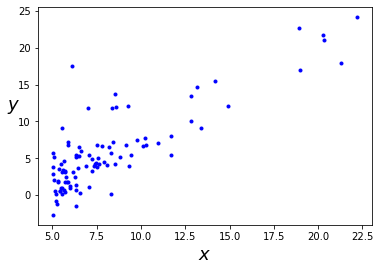

In [5]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)


In [7]:
X_b = np.c_[np.ones((len(X),1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[-3.89578088  1.19303364]


In [8]:
X_b.shape

(97, 2)

In [9]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([-3.89578088, -1.50971359])

Text(0, 0.5, '$y$')

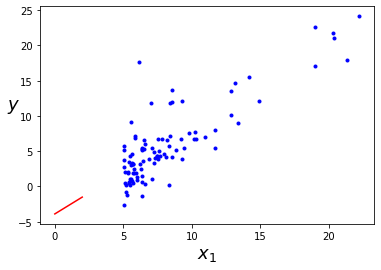

In [10]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

In [11]:
def computeCost(X, y, theta):
    m  = len(y)
    return (1 / (2 * m)) * np.sum(((X @ theta) - y) ** 2)

In [12]:
computeCost(X_b, y, np.zeros((2,1)))

3111.0551861132

In [13]:
def gradientDescentX(X, y, theta, alpha=0.01, num_iters=100):
    m = len(y)
    j_history = np.zeros(num_iters)
    theta_history = np.zeros((num_iters, 2))
    for itr in range(num_iters):
        prediction = np.dot(X, theta)

        #theta[0,0] = theta[0,0] - (alpha/m) * ((prediction - y).sum())
        #theta[0,1] = theta[0,1] - (alpha/m) * (((prediction - y)*X[:,1]).sum())

        theta = theta - (1/m) * alpha * ( X.T.dot((prediction - y)))
        theta_history[itr,:] = theta.T
        j_history[itr] = computeCost(X, y, theta)
    return theta, j_history, theta_history

def gradientDescent(X, y, theta, alpha=0.01, num_iters=100):
    m = len(y)
    J = 0
    theta_history = np.zeros((num_iters,2))
    for i in range(num_iters):
        theta = theta - ( alpha / m ) * X.T @ (X @ theta - y)
        theta_history[i,:] =theta.T
        J = computeCost(X , y , theta)
    return J, theta


In [14]:
lr =0.01
n_iter = 1500

theta = np.zeros((2,1))

X_b = np.c_[np.ones((len(X),1)),X]
j_history, theta = gradientDescent(X_b,y,theta,lr,n_iter)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(j_history))

ValueError: could not broadcast input array from shape (97,2) into shape (2)

In [15]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),j_history,'b.')

NameError: name 'j_history' is not defined